In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns; sns.set()

In [3]:
random_state = 42

In [4]:
np.random.seed(random_state)

In [5]:
filename = 'practical_ml_data.csv'

In [6]:
!head -n 2 $filename

capacity;failure_rate;id;margin;price;prod_cost;product_type;quality;warranty;market_share;attractiveness
15.863467389238027;0.038191165590046976;4595;696.9014314447229;894.9476372703357;198.0462058256128;1;1;3;0.007923039881769393;0.7618104239359441


In [7]:
df = pd.read_csv(filename, delimiter=';')
#df.dtypes
df.describe()
#df.dtypes

,capacity,failure_rate,id,margin,price,product_type,quality,warranty,market_share,attractiveness
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,47.536101,0.166353,4758.000000,184.280464,260.661750,2.503217,1.418156,1.496783,0.002144,0.636840
std,19.314640,0.073473,404.000825,186.232373,255.995938,0.665809,0.684165,0.665809,0.001855,0.127691
min,0.011017,0.028543,4059.000000,51.866176,62.867922,1.000000,1.000000,1.000000,0.000565,0.296983
25%,35.884996,0.095183,4408.500000,62.220398,73.515577,2.000000,1.000000,1.000000,0.001135,0.544152
50%,49.871854,0.203332,4758.000000,66.889402,79.342542,3.000000,1.000000,1.000000,0.001430,0.643962
75%,61.348800,0.227582,5107.500000,265.993396,384.414368,3.000000,2.000000,2.000000,0.002360,0.727886
max,97.255648,0.292920,5457.000000,801.882180,962.444077,3.000000,3.000000,3.000000,0.009727,0.935264


In [8]:
#s = pd.Series(list('abca'))
pd.get_dummies(df.product_type, prefix='type_')
#df = df.join(pd.get_dummies(df.product_type, prefix='type_'))
#df.columns
#df.product_type

,type__1,type__2,type__3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [9]:
def read_data(filename, dummify=False, drop_market_share=True, correct_capacity=True):
    df = pd.read_csv(filename, sep=';', index_col=2)
    df.product_type = df.product_type.astype('category')
    df.prod_cost = df.prod_cost.replace('unknown', np.nan).astype('float')
    df.loc[df.prod_cost <= 0,'prod_cost'] = np.nan
    
    if correct_capacity:
        s = df.capacity[df.capacity < 1]
        df.loc[s.index, 'capacity'] *= 1000

    if dummify:
        df = df.join(pd.get_dummies(df.product_type, prefix='type_')).drop('product_type', axis=1)
    if drop_market_share and 'market_share' in df.columns:
        df.drop('market_share', axis=1, inplace=True)
        
    return df

In [10]:
df = read_data(filename, correct_capacity=False)
df.head()

,capacity,failure_rate,margin,price,prod_cost,product_type,quality,warranty,attractiveness
id,,,,,,,,,
4595,15.863467,0.038191,696.901431,894.947637,198.046206,1,1,3,0.761810
4200,31.296753,0.035173,633.127281,823.895981,190.768700,1,1,3,0.592772
5222,19.078452,0.032237,727.764529,876.588344,148.823816,1,1,3,0.650094
5427,0.011017,0.040948,704.340185,856.532740,152.192554,1,1,3,0.565269
4962,16.101940,0.036371,637.898815,817.097250,179.198434,1,1,3,0.759488


In [11]:
df.dtypes

capacity           float64
failure_rate       float64
margin             float64
price              float64
prod_cost          float64
product_type      category
quality              int64
warranty             int64
attractiveness     float64
dtype: object

## Data exploration

In [12]:
df.describe()

,capacity,failure_rate,margin,price,prod_cost,quality,warranty,attractiveness
count,1399.000000,1399.000000,1399.000000,1399.000000,1330.000000,1399.000000,1399.000000,1399.000000
mean,47.536101,0.166353,184.280464,260.661750,58.454331,1.418156,1.496783,0.636840
std,19.314640,0.073473,186.232373,255.995938,60.108860,0.684165,0.665809,0.127691
min,0.011017,0.028543,51.866176,62.867922,7.807315,1.000000,1.000000,0.296983
25%,35.884996,0.095183,62.220398,73.515577,10.831423,1.000000,1.000000,0.544152
50%,49.871854,0.203332,66.889402,79.342542,12.382957,1.000000,1.000000,0.643962
75%,61.348800,0.227582,265.993396,384.414368,114.849679,2.000000,2.000000,0.727886
max,97.255648,0.292920,801.882180,962.444077,218.245539,3.000000,3.000000,0.935264


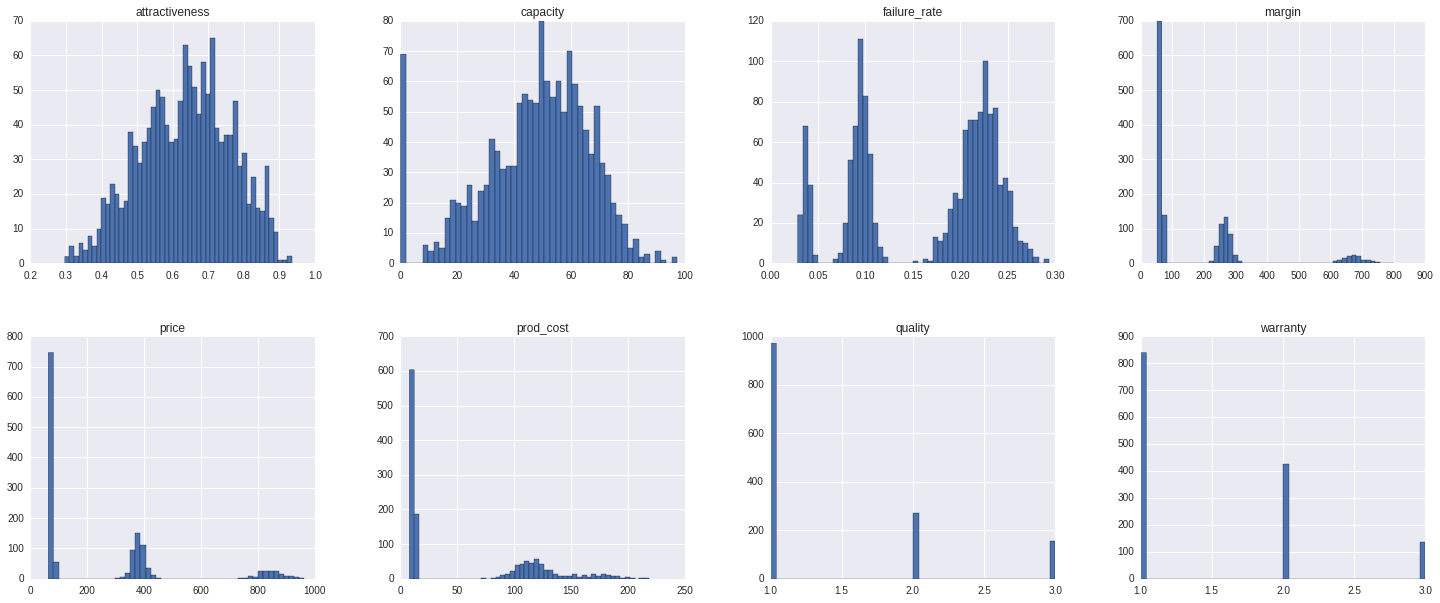

In [13]:
df.hist(figsize=(25, 10), bins=50, layout=(2, 4)); #failure rate, margin, price, prod cost, .. very correlated

### What's wrong with the capacity?

In [14]:
s = df.capacity[df.capacity < 1]

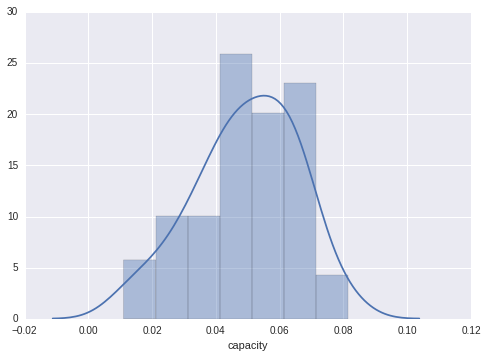

In [15]:
sns.distplot(s);

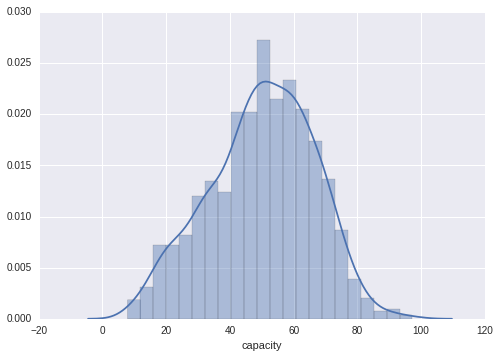

In [16]:
sns.distplot(df.capacity.drop(s.index, axis=0));

In [17]:
df = read_data(filename, correct_capacity=True, dummify=True)
df.head()

,capacity,failure_rate,margin,price,prod_cost,quality,warranty,attractiveness,type__1,type__2,type__3
id,,,,,,,,,,,
4595,15.863467,0.038191,696.901431,894.947637,198.046206,1,3,0.761810,1,0,0
4200,31.296753,0.035173,633.127281,823.895981,190.768700,1,3,0.592772,1,0,0
5222,19.078452,0.032237,727.764529,876.588344,148.823816,1,3,0.650094,1,0,0
5427,11.016716,0.040948,704.340185,856.532740,152.192554,1,3,0.565269,1,0,0
4962,16.101940,0.036371,637.898815,817.097250,179.198434,1,3,0.759488,1,0,0


/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


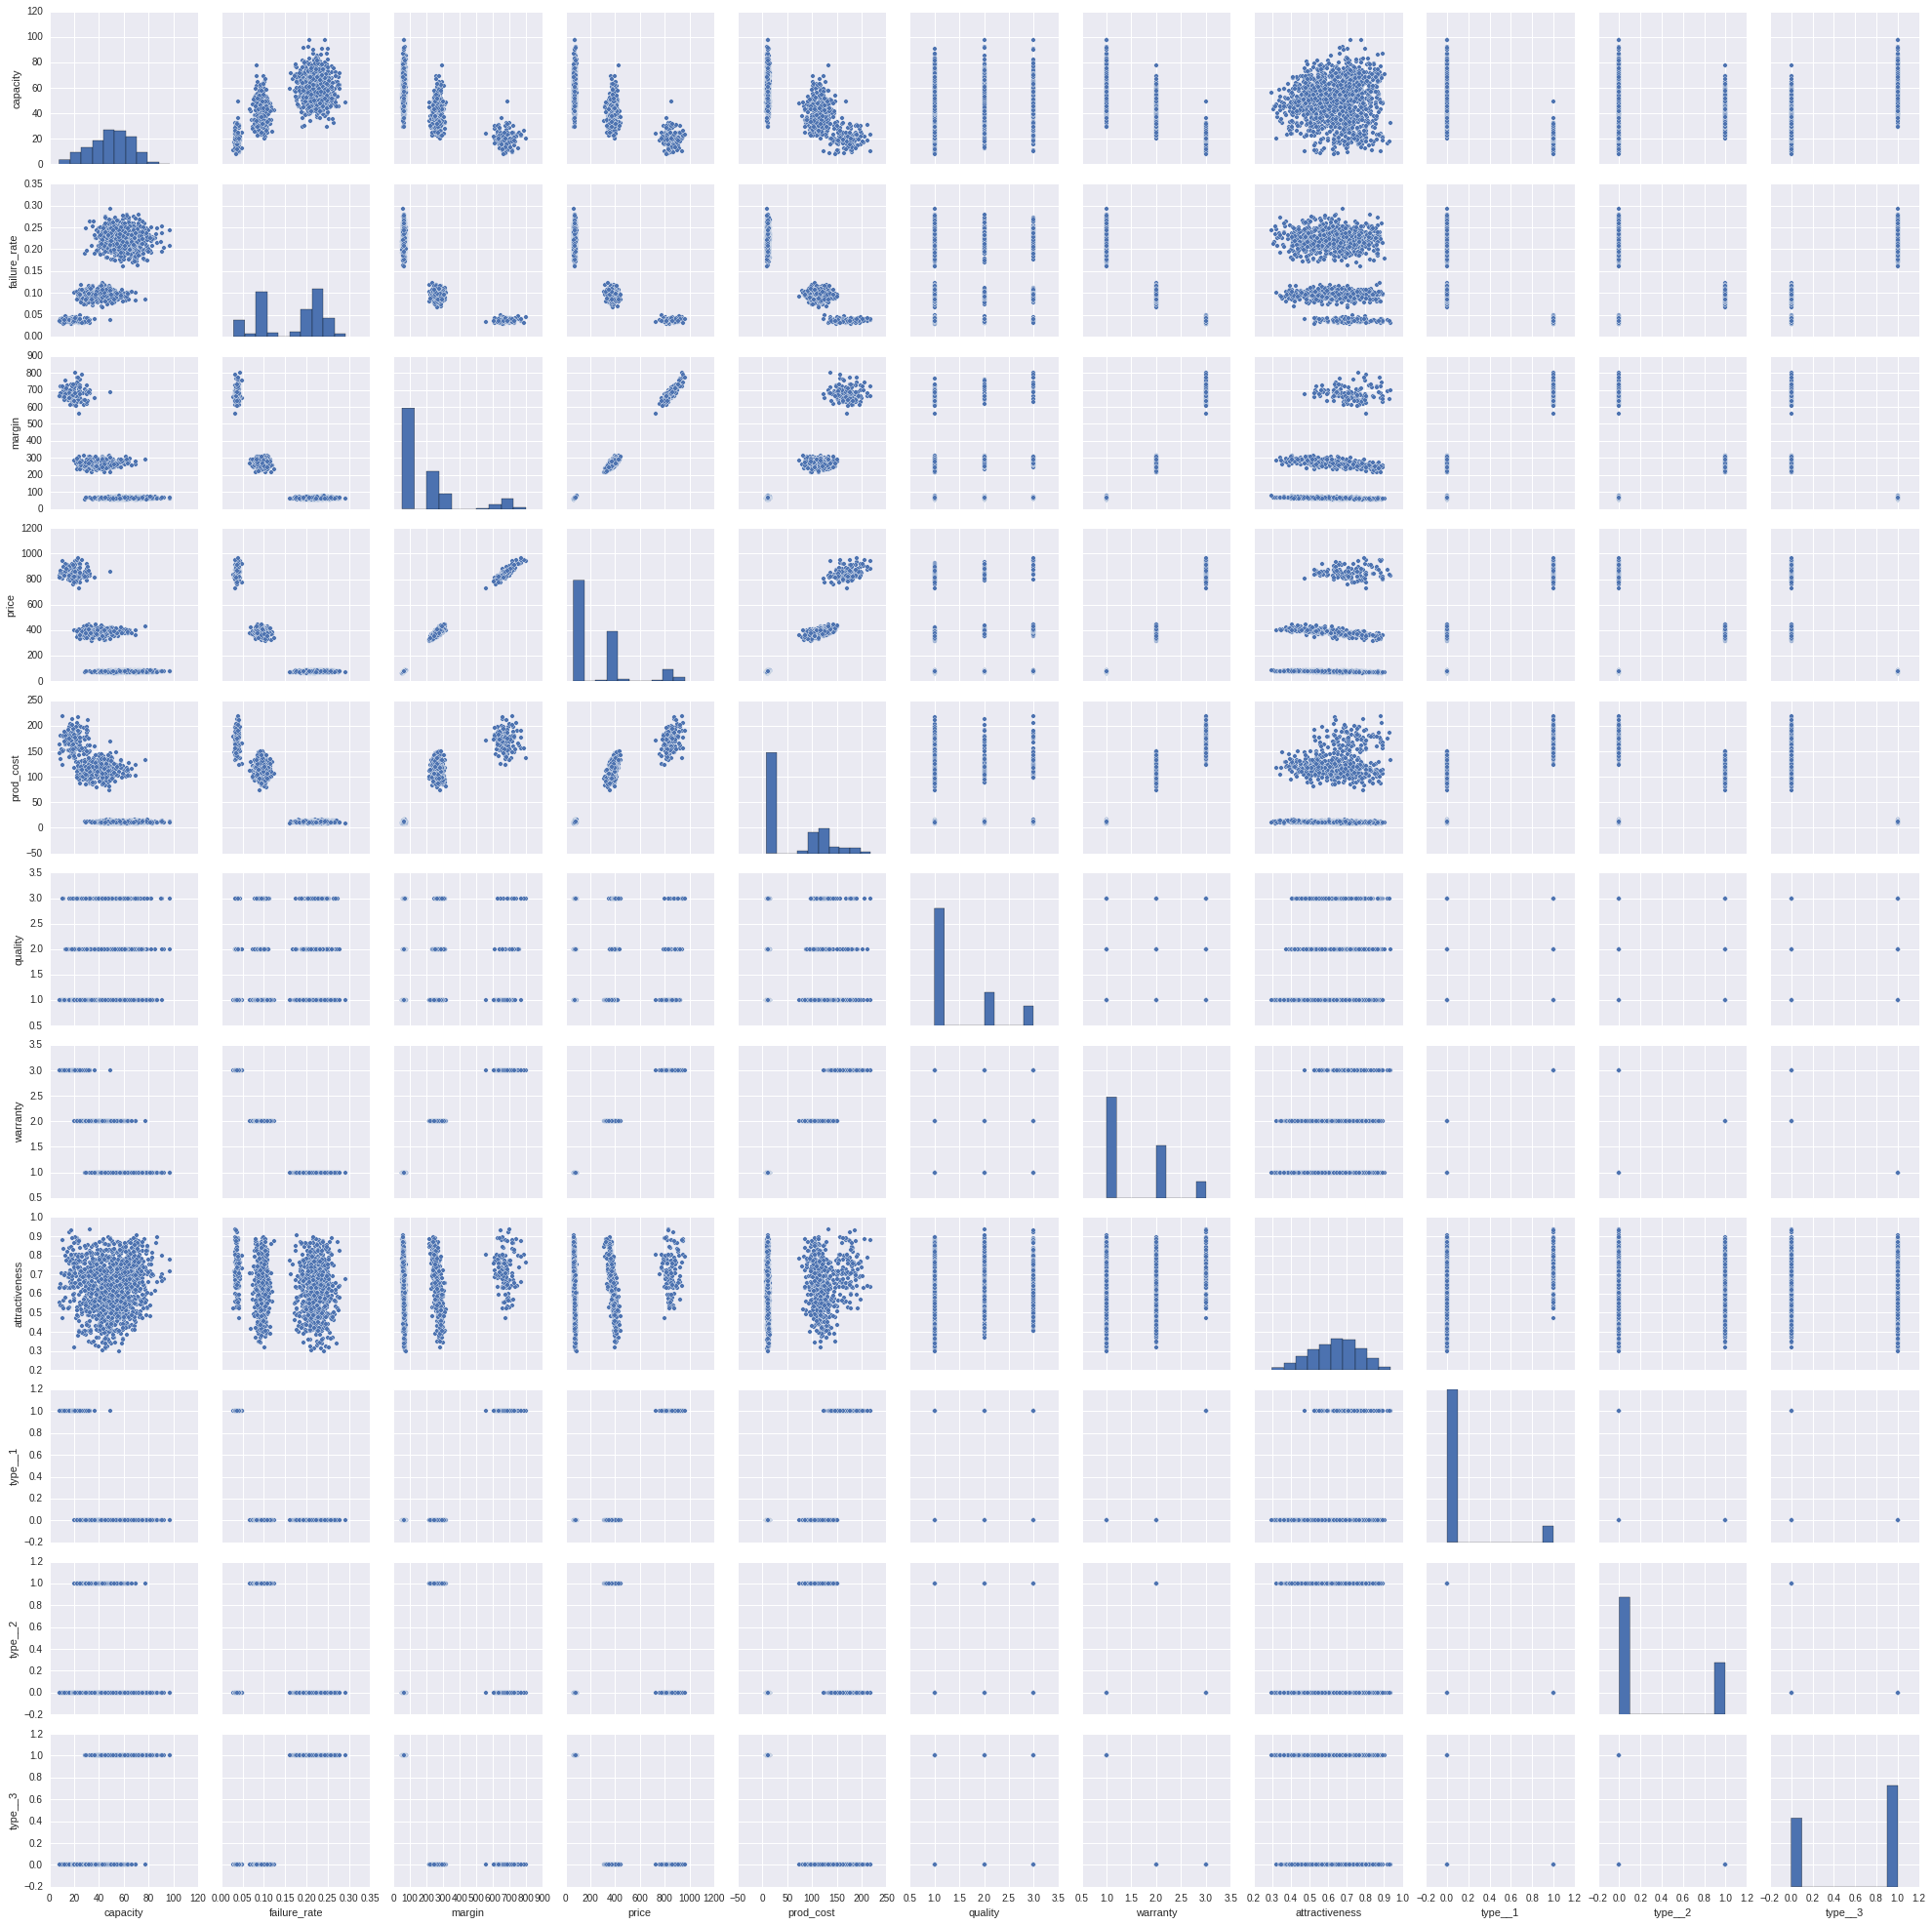

In [18]:
sns.pairplot(df.dropna());

## The ML part

In [19]:
from sklearn.decomposition import PCA, KernelPCA

In [20]:
from sklearn.pipeline import make_pipeline

In [21]:
from sklearn.preprocessing import Imputer

In [22]:
from sklearn.metrics import make_scorer

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcess
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import cross_val_score

In [24]:
from sklearn.cross_validation import KFold, ShuffleSplit

In [25]:
from sklearn.learning_curve import learning_curve

In [26]:
from sklearn.dummy import DummyRegressor

In [27]:
from sklearn.manifold import TSNE

In [28]:
from sklearn.grid_search import GridSearchCV

### The cost function

In [ ]:
np.average

In [27]:
def obj_function(y_true, y_pred):
    return np.sqrt( np.average((( np.log(y_pred + 1) - np.log(y_true + 1)) ** 2)) )
RMSL_error = make_scorer(obj_function, greater_is_better=False)

In [28]:
X = df.dropna().drop('attractiveness', axis=1).values
y = df.dropna().attractiveness.values

### PCA & Variance

In [29]:
pipe = make_pipeline( Imputer(), PCA() ).fit(X)

In [30]:
pca = pipe.named_steps['pca']

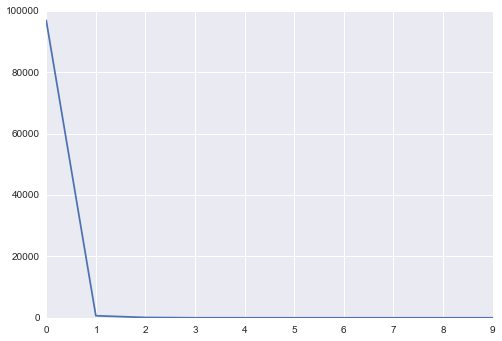

In [31]:
plt.plot(pca.explained_variance_);

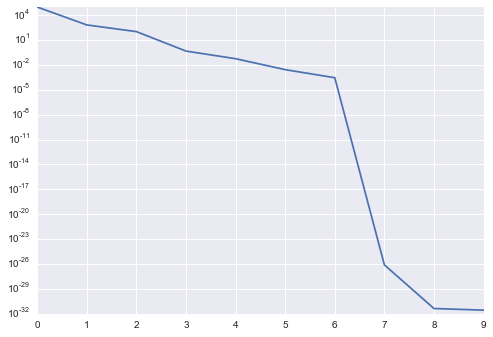

In [32]:
plt.semilogy(pca.explained_variance_);

In [33]:
cv = ShuffleSplit(X.shape[0], test_size=0.7, random_state=random_state)

In [34]:
X_pca_2 = PCA(n_components=2).fit_transform(X)

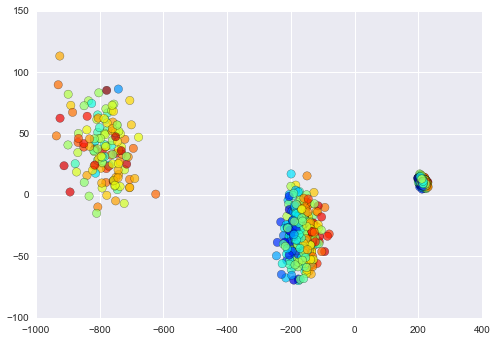

In [35]:
plt.scatter(X_pca_2[:,0], X_pca_2[:, 1], s=70, c=y, alpha=.7, cmap=plt.cm.jet);

In [ ]:
X_tsne_2 = TSNE(n_components=2, random_state=random_state).fit_transform(X)

In [ ]:
plt.scatter(X_tsne_2[:,0], X_tsne_2[:, 1], s=70, c=y, alpha=.7, cmap=plt.cm.jet)

### Ensembling regressors

In [41]:
ensembling_range = np.arange(1, 101, 5)

In [42]:
def plot_with_std(train_scores, test_scores, param_range): 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, label="train", linestyle='-', marker='o', color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, label="valid", color="g", marker='o')
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")

In [43]:
def plot_learning_curve(est, X, y, param_range, scoring=RMSL_error, n_jobs=-1, cv=cv):
    dummy_cv = cross_val_score(DummyRegressor(), X, y, cv=cv, scoring=RMSL_error)
    train_scores, test_scores = validation_curve(est, X, y, 
                                                 'n_estimators', param_range, 
                                                 scoring=scoring, n_jobs=n_jobs, cv=cv)
    plot_with_std(-train_scores, -test_scores, param_range)
    plt.axhline(-dummy_cv.mean(), alpha=.7, label='Dummy')
    
    plt.xlabel('# Base predictor')
    plt.ylabel('RMSL')
    plt.legend(loc="best")

In [44]:
def cross_val(est, X, y, cv=cv, n_jobs=-1, scoring=RMSL_error):
    cvs = cross_val_score(est, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring)
    print('Mean: \t%f' % -cvs.mean())
    print('Std : \t%f' % cvs.std())
    return cvs

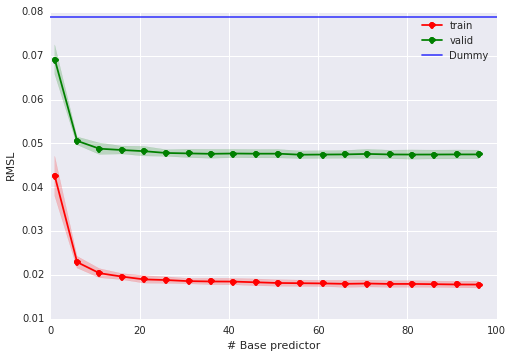

In [45]:
plot_learning_curve(RandomForestRegressor(), X, y, ensembling_range)

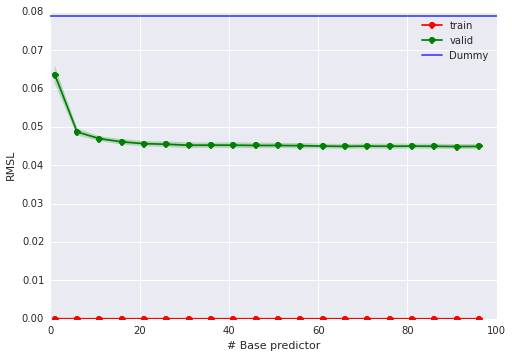

In [46]:
plot_learning_curve(ExtraTreesRegressor(), X, y, ensembling_range)

In [47]:
param_grid = {
    'n_estimators' : np.arange(2, 11) * 100,
    'min_samples_split': [2, 8],
}

In [48]:
gs_etr = GridSearchCV(ExtraTreesRegressor(n_jobs=-1), param_grid, scoring=RMSL_error, n_jobs=-1, cv=cv).fit(X, y)

In [49]:
cross_val(ExtraTreesRegressor(n_estimators=800, min_samples_split=8, n_jobs=-1), X, y, cv=cv);

Mean: 	0.043758
Std : 	0.000614


In [69]:
b=(1048576,[38034,50891,58741,84733,94869,99552,104426,111045,141068,169818,212569,232348,232395,245817,253338,261280,266621,267564,280039,301456,337867,339588,353087,370607,387844,389192,390997,396665,426980,438910,493169,499401,530875,558402,590424,608665,648072,688378,702341,709318,742235,743662,755331,787763,809742,839624,855273,865620,880093,886775,895812,917158,920079,920335,934201,942178,944612,951827,955644,968583,986474,1015254],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0])
type(b[1])
c=[b,b]
len(c[0])

3

In [71]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
				'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', "isn't",'are',"aren't",
                'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','films',
                'film','movies','movie','br',' ', '']
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 "isn't",
 'are',
 "aren't",
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'suc